# DataCamp Certification Case Study

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df=pd.read_csv('data/rentals.csv')
#Get a look at the data
print('Data Shape:',df.shape)
df.head()

Data Shape: (8111, 9)


,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [4]:
#Check Summary Statistics
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08


# Data Preprocessing

In [5]:
#Strip the dollar sign
df['price']=df['price'].str.strip('$')

#Replace comma with '' and turn it into float
df['price']=df['price'].str.replace(',','').astype('float')
df['price'].dtype

dtype('float64')

In [6]:
#Rechecking the Summary Statistics
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03,8111.000000
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04,225.407101
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06,412.253039
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00,0.000000
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00,100.000000
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00,150.000000
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01,240.000000
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08,10000.000000


As we can see, there is a data with the price of 0, which doesn't make sense. This could be an error in the input or it's just a dummy data that were used to test the application. Let's check the data.

In [7]:
df[df['price']==0]

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
3752,20331804,37.74479,-122.41977,Condominium,Private room,1.0,1.0,4,0.0


As we can see, it's most likely an input error, hence, it's best to drop it.

In [8]:
df=df.drop(df[df['price']==0].index,axis=0)

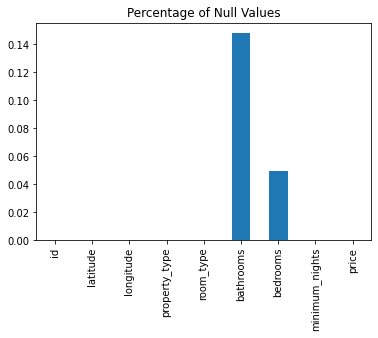

In [9]:
#Check for null values percentage
null_values=df.isna().sum()

#Plot null values
(null_values/df.shape[0]*100).plot(kind='bar')
plt.title('Percentage of Null Values')
plt.show()

Because the number of null values are small, it's best to drop it

In [10]:
#bathroom_median=df['bathrooms'].median()
#bedroom_median=df['bedrooms'].median()
#df['bathrooms']=df['bathrooms'].fillna(bathroom_median)
#df['bedrooms']=df['bedrooms'].fillna(bedroom_median)

df=df.dropna()

# Exploratory Data Analysis

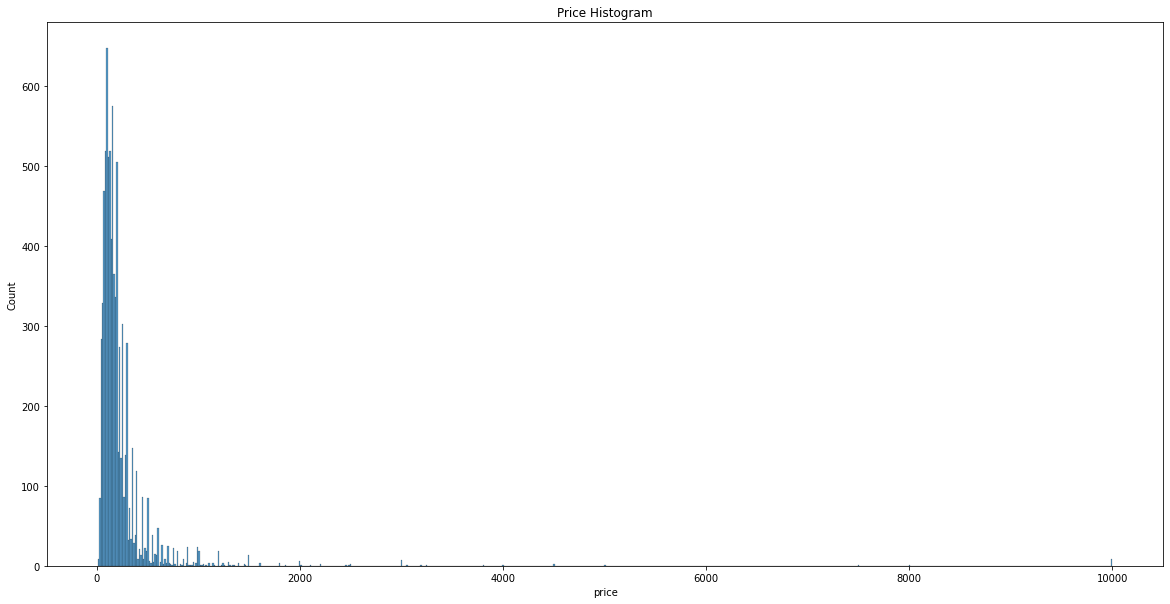

In [11]:
fig,ax=plt.subplots(figsize=(20,10))
sns.histplot(x='price',data=df)
plt.title('Price Histogram')
plt.show()

Distribution is skewed because of outliers

In [12]:
def outliers(df,col):
    pct25=np.percentile(df[col],25)
    pct75=np.percentile(df[col],75)
    iqr=pct75-pct25
    upper=pct75+1.2*iqr
    lower=pct25-1.2*iqr
    return upper,lower
upper_price,lower_price=outliers(df,'price')

In [13]:
df=df.drop(df[df['price']>upper_price].index,axis=0)

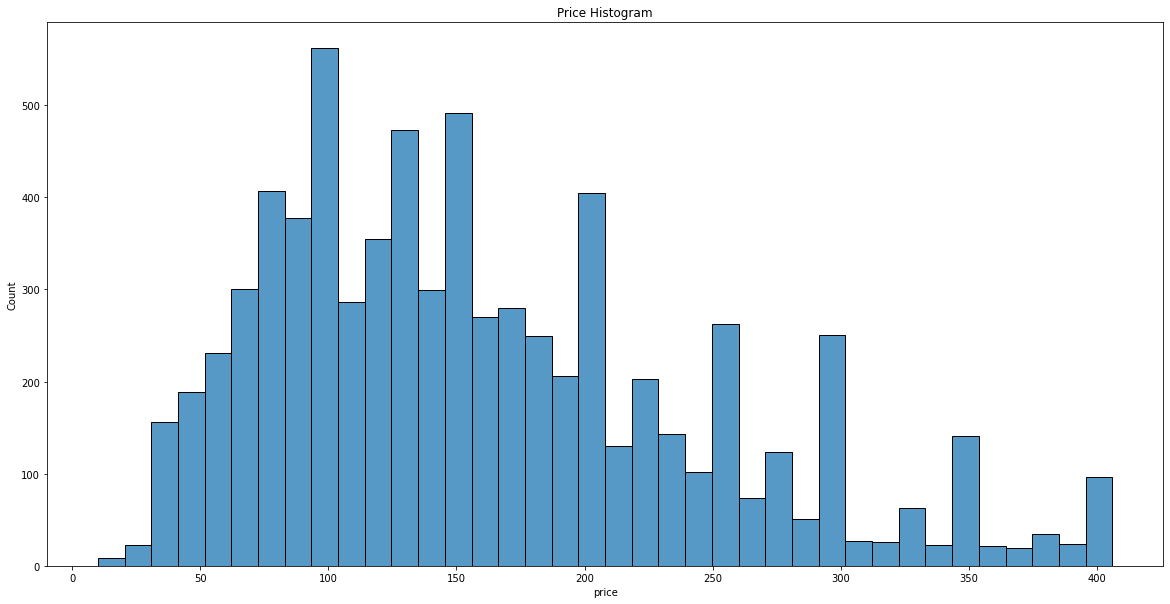

In [14]:
fig,ax=plt.subplots(figsize=(20,10))
sns.histplot(x='price',data=df)
plt.title('Price Histogram')
plt.show()

In [15]:
df=df.drop(df[df['price']>300].index,axis=0)

Apartment             2883
House                 1871
Condominium            676
Guest suite            557
Boutique hotel         236
Hotel                  134
Townhouse              111
Serviced apartment     100
Hostel                  85
Loft                    65
Aparthotel              40
Bed and breakfast       37
Guesthouse              34
Other                   24
Bungalow                16
Cottage                 10
Villa                    9
Resort                   4
Castle                   4
Tiny house               3
Cabin                    3
Dome house               1
Earth house              1
Hut                      1
Camper/RV                1
In-law                   1
Name: property_type, dtype: int64

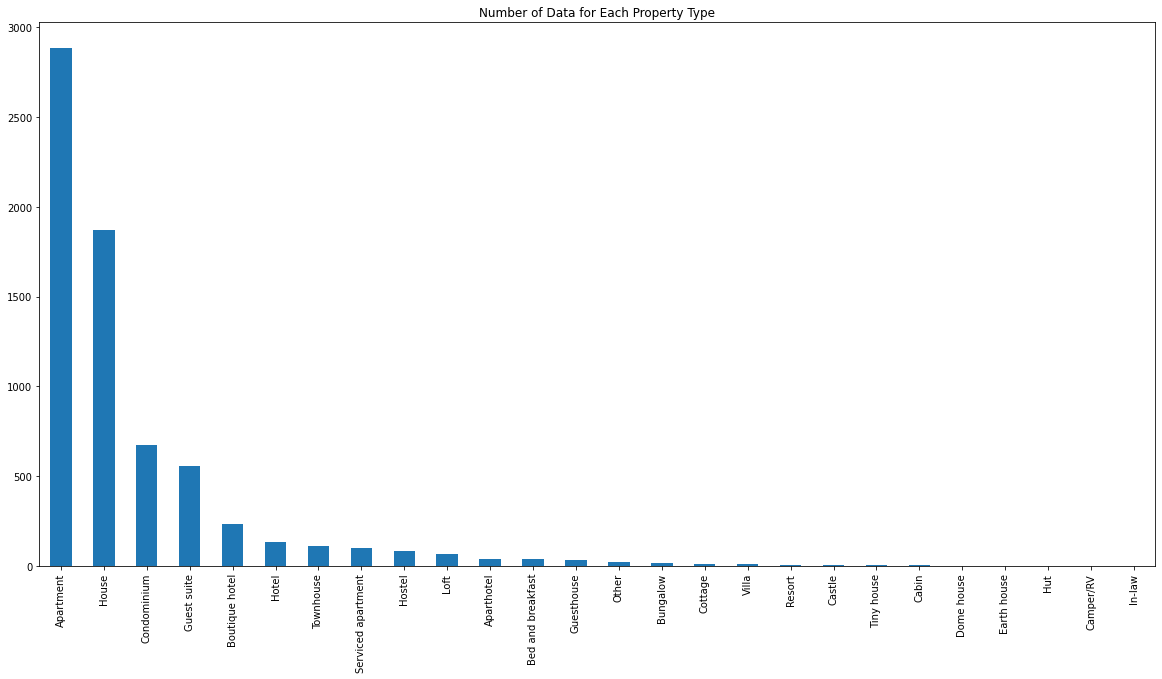

In [16]:
display(df['property_type'].value_counts(ascending=False))
fig,ax=plt.subplots(figsize=(20,10))
df['property_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Property Type')
plt.show()

As we can see, the columns contains many categories that contain small number of data. To simplify the data, I am dropping categories with number below 100. The data also contains category that aren't relevant to the analysis, such as hotels, bungalow, resort, etc, since this analysis is to figure out the price to rent someone's living space and not properties intended for commercial use, those categories should be dropped.

Apartment      2983
House          1982
Condominium     676
Name: property_type, dtype: int64

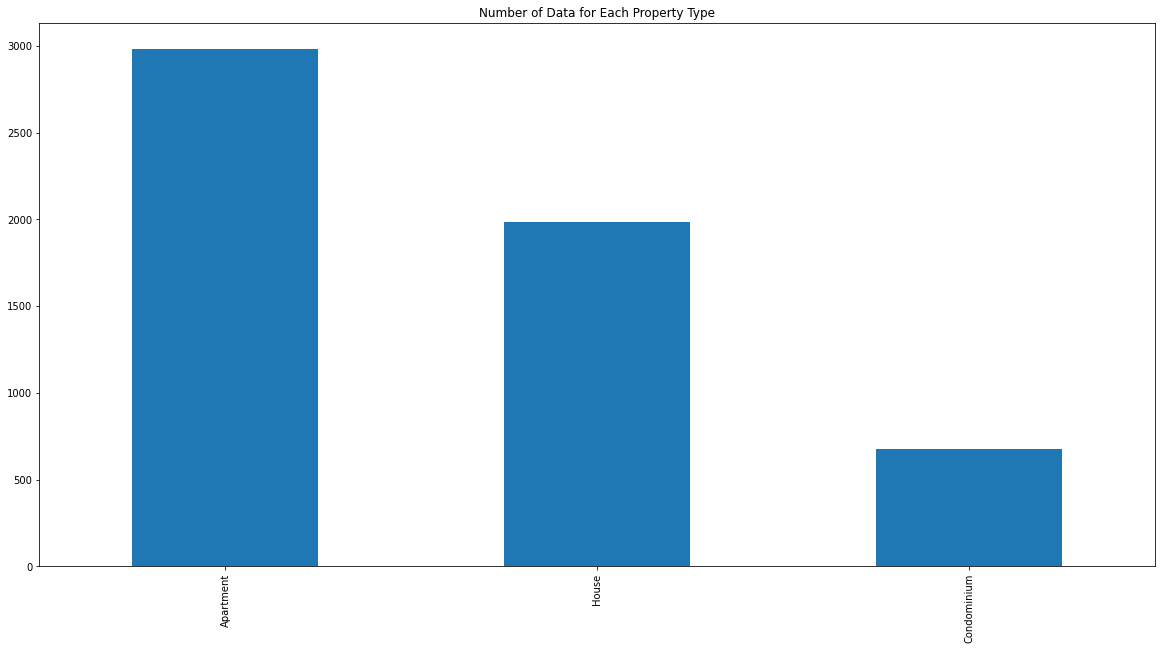

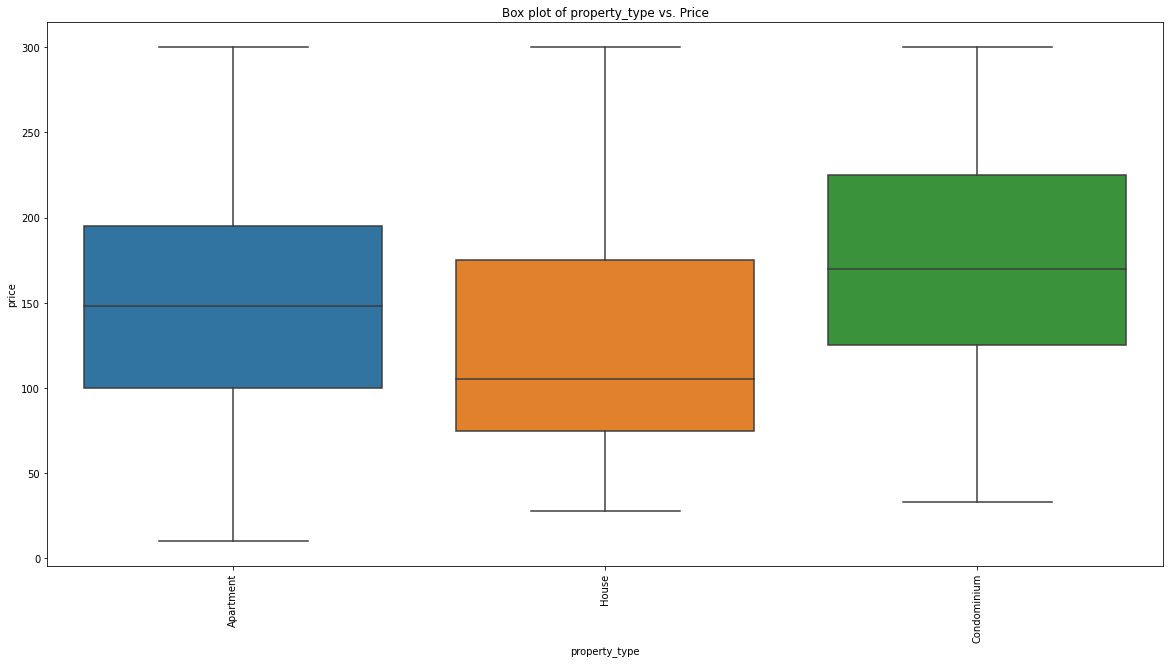

In [17]:
category_to_drop=drop_list =['Hotel', 'Hostel','Aparthotel', 'Other', 'Bungalow', 'Boutique hotel',
                             'Resort', 'Cottage', 'Villa', 'Castle', 'Cabin', 'Camper/RV', 'In-law', 
                             'Hut', 'Dome house','Tiny house','Earth house','Guesthouse',
                             'Guest suite','In-law','Bed and Breakfast','Loft']

df=df.drop(df[df['property_type'].isin(category_to_drop)].index,axis=0)
Apartment=['Apartment','Serviced apartment']
House=['House','Townhouse']
#Guesthouse=['Guesthouse','Guest suite','In-law','Bed and Breakfast','Loft']

def combine_category(category_list,new_category_name):
    return df['property_type'].replace(category_list,new_category_name)
    
df['property_type']=combine_category(Apartment,'Apartment')
df['property_type']=combine_category(House,'House')
#df['property_type']=combine_category(Guesthouse,'Guesthouse')
    
count_pro_type=df['property_type'].value_counts()
less_than_100=count_pro_type[count_pro_type<100].index
df=df.drop(df[df['property_type'].isin(less_than_100)].index,axis=0)

display(df['property_type'].value_counts(ascending=False))
fig,ax=plt.subplots(figsize=(20,10))
df['property_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Property Type')
plt.show()

fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x='property_type',y='price',data=df)
plt.title('Box plot of property_type vs. Price')
plt.xticks(rotation=90)
plt.show()

Apartment      2983
House          1917
Condominium     676
Name: property_type, dtype: int64

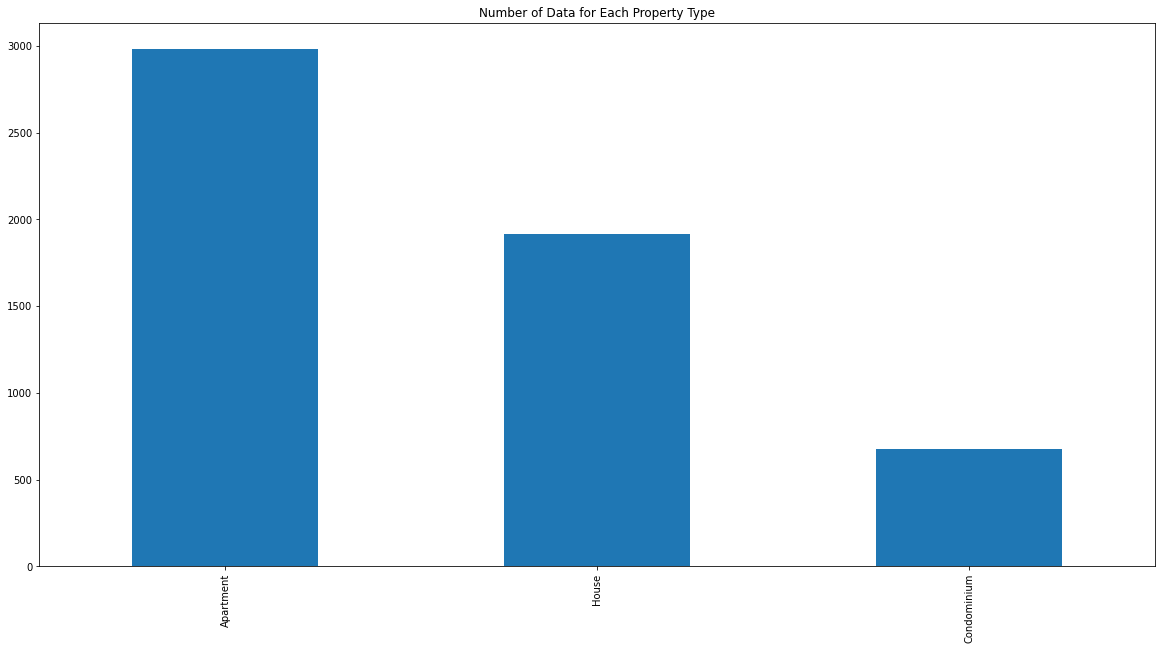

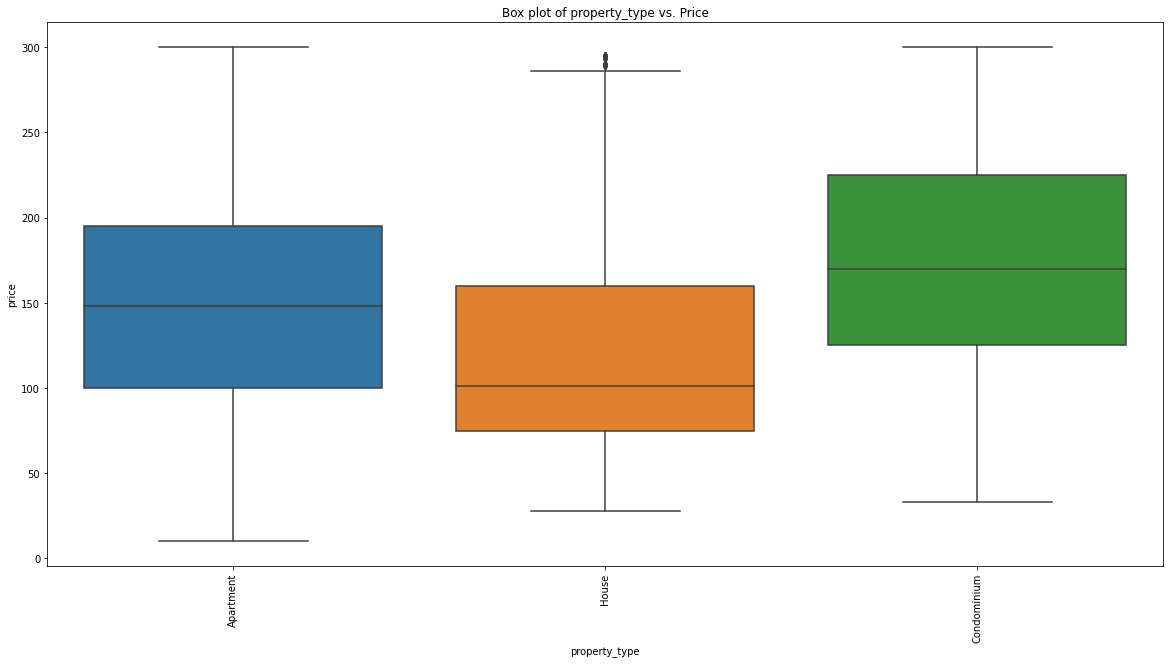

In [18]:
apartment=df[df['property_type']=='Apartment']
house=df[df['property_type']=='House']
condo=df[df['property_type']=='Condominium']

apartment=apartment.drop(apartment[apartment['price']>outliers(apartment,'price')[0]].index,axis=0)
house=house.drop(house[house['price']>outliers(house,'price')[0]].index,axis=0)
condo=condo.drop(condo[condo['price']>outliers(condo,'price')[0]].index,axis=0)
df=pd.concat([apartment,house,condo],axis=0)

display(df['property_type'].value_counts(ascending=False))
fig,ax=plt.subplots(figsize=(20,10))
df['property_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Property Type')
plt.show()

fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x='property_type',y='price',data=df)
plt.title('Box plot of property_type vs. Price')
plt.xticks(rotation=90)
plt.show()

Entire home/apt    3067
Private room       2295
Shared room         181
Hotel room           33
Name: room_type, dtype: int64

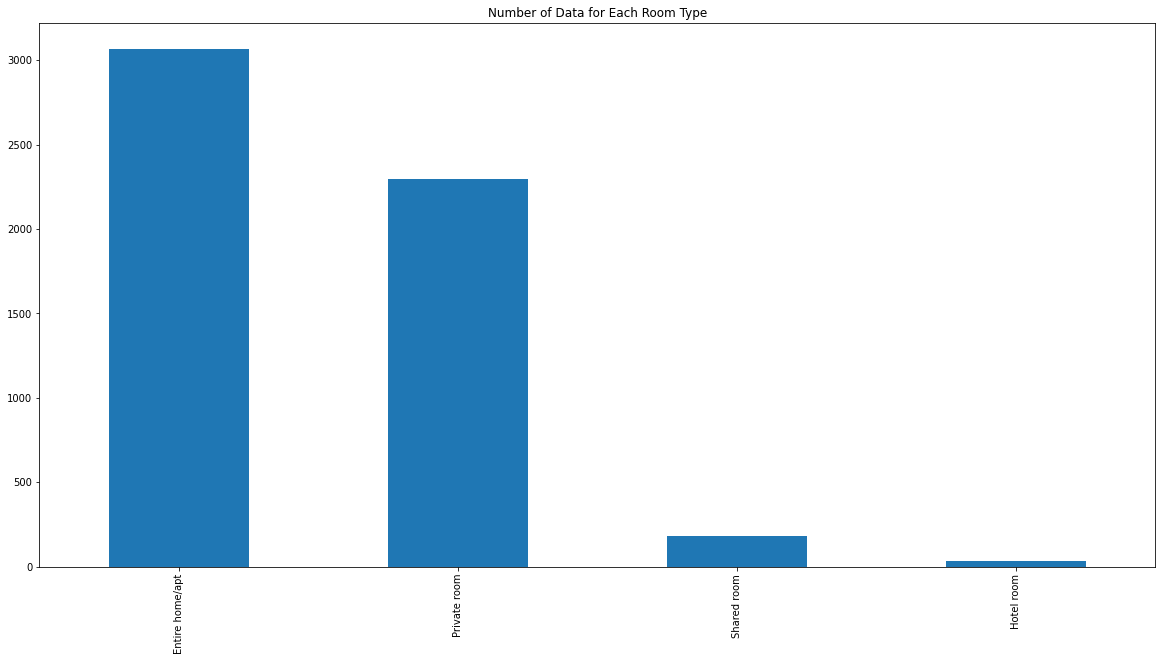

In [19]:
display(df['room_type'].value_counts(ascending=False))

fig,ax=plt.subplots(figsize=(20,10))
df['room_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Room Type')
plt.show()

Also for the room_type columns, the category shared room and hotel room have a very small number of data compared to the entire home and private room category. Hence, it's best to drop them to prevent noises for the machine learning algorithm.

Entire home/apt    3067
Private room       2295
Name: room_type, dtype: int64

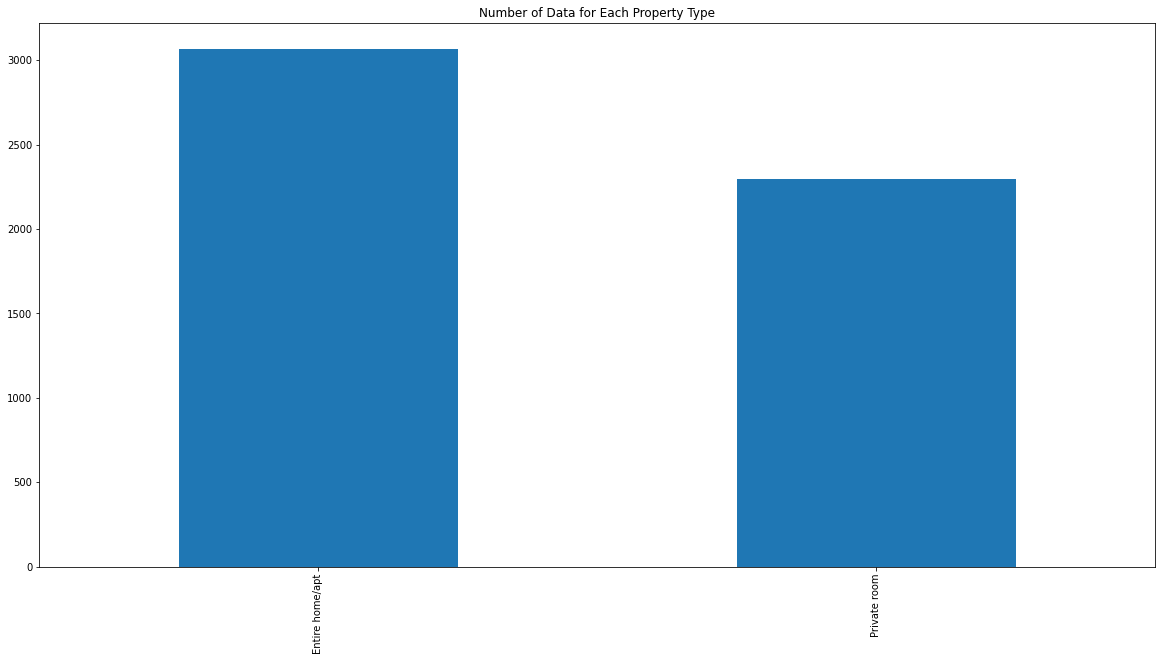

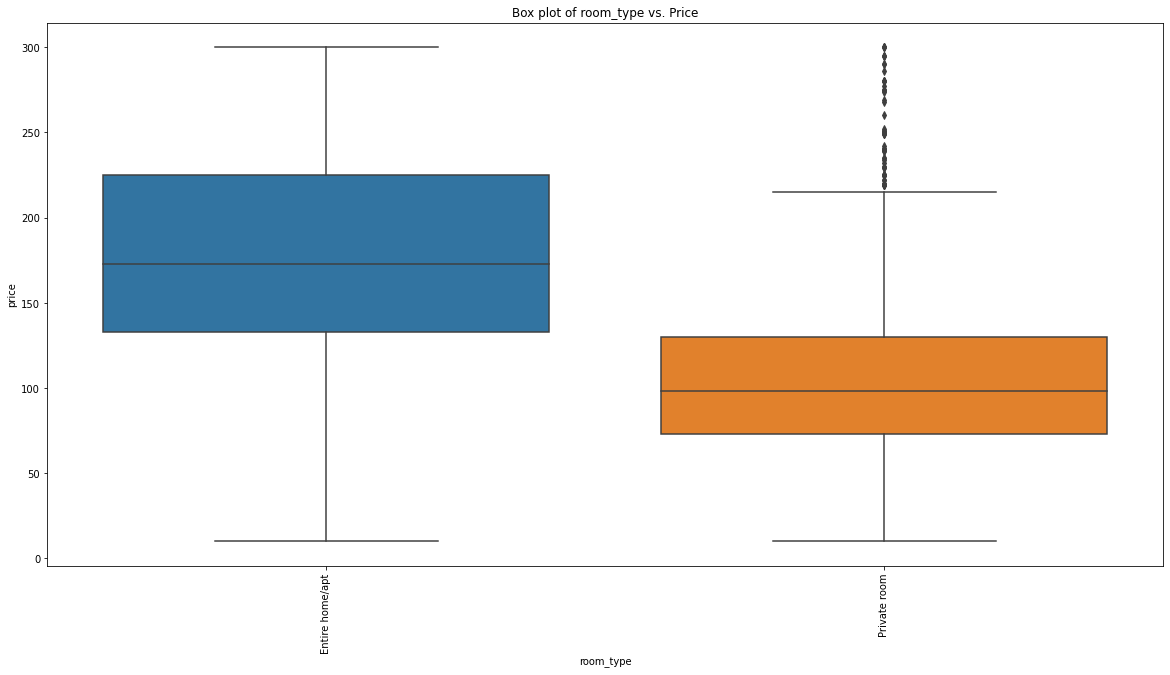

In [20]:
count_room_type=df['room_type'].value_counts()
roome_less_than_300=count_room_type[count_room_type<300]
df=df.drop(df[df['room_type'].isin(roome_less_than_300.index)].index,axis=0)

display(df['room_type'].value_counts(ascending=False))
fig,ax=plt.subplots(figsize=(20,10))
df['room_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Property Type')
plt.show()

fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Box plot of room_type vs. Price')
plt.xticks(rotation=90)
plt.show()

Private room    2132
Entire_apt      2118
Entire_house     522
Entire_Condo     427
Name: room_type, dtype: int64

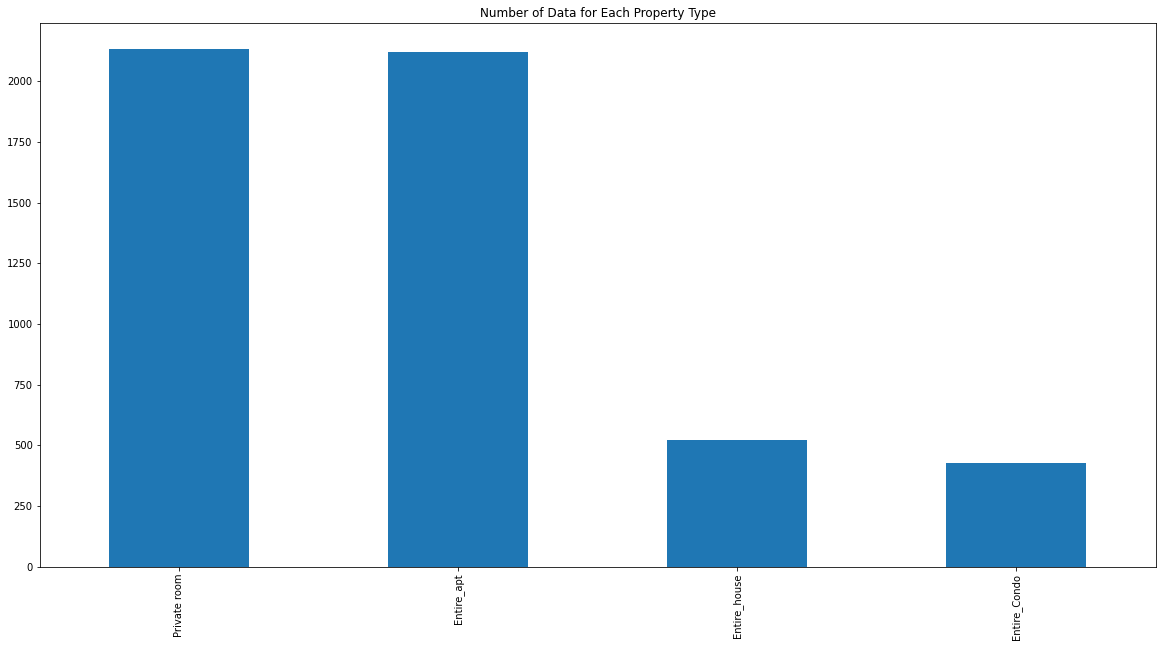

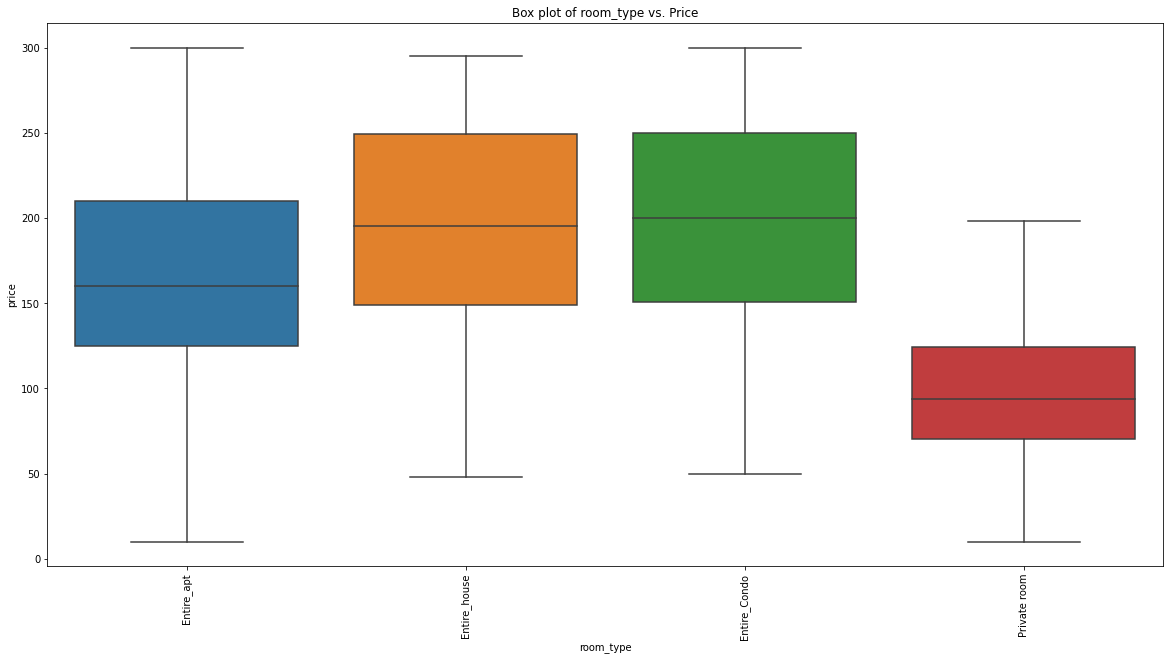

In [21]:
#Handling Outliers
entire_home=df[df['room_type']=='Entire home/apt']
private_room=df[df['room_type']=='Private room']

entire_home=entire_home.drop(entire_home[entire_home['price']>outliers(entire_home,'price')[0]].index,axis=0)
private_room=private_room.drop(private_room[private_room['price']>outliers(private_room,'price')[0]].index,axis=0)
df=pd.concat([entire_home,private_room],axis=0)

#Dropping data that aren't useful for analysis
index1=df[(df['room_type']=='Entire home/apt') & (df['property_type']=='House')].index
index2=df[(df['room_type']=='Entire home/apt') & (df['property_type']=='Apartment')].index
index3=df[(df['room_type']=='Entire home/apt') & (df['property_type']=='Condominium')].index
df.loc[index1,'room_type']='Entire_house'
df.loc[index2,'room_type']='Entire_apt'
df.loc[index3,'room_type']='Entire_Condo'

display(df['room_type'].value_counts(ascending=False))
fig,ax=plt.subplots(figsize=(20,10))
df['room_type'].value_counts(ascending=False).plot(kind='bar')
plt.title('Number of Data for Each Property Type')
plt.show()

fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x='room_type',y='price',data=df)
plt.title('Box plot of room_type vs. Price')
plt.xticks(rotation=90)
plt.show()

In [22]:
df['room_type'].value_counts()

Private room    2132
Entire_apt      2118
Entire_house     522
Entire_Condo     427
Name: room_type, dtype: int64

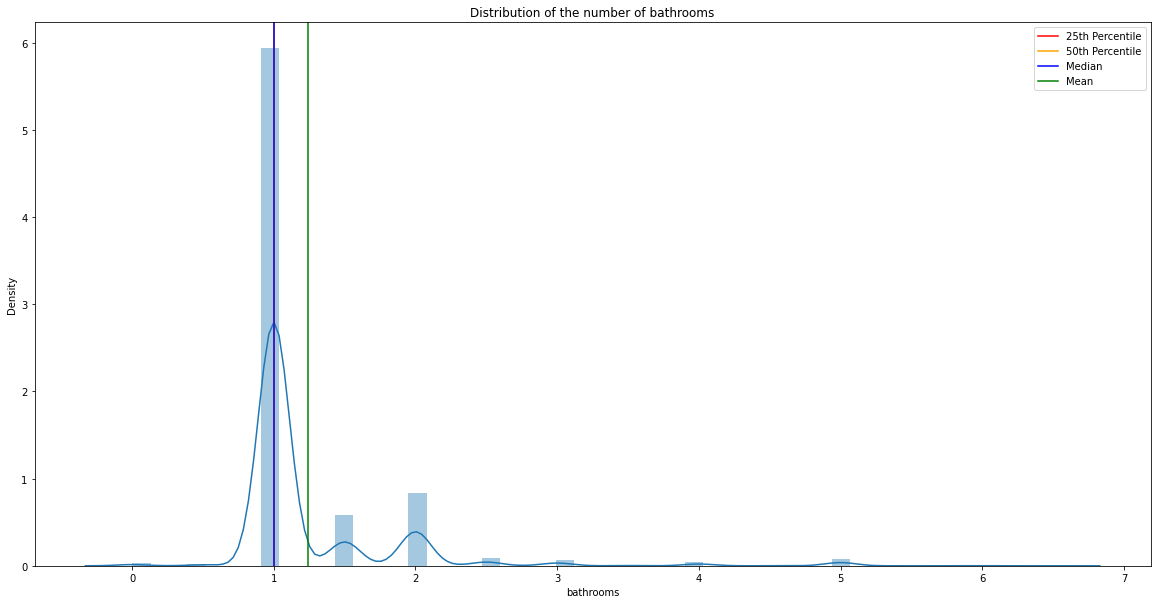

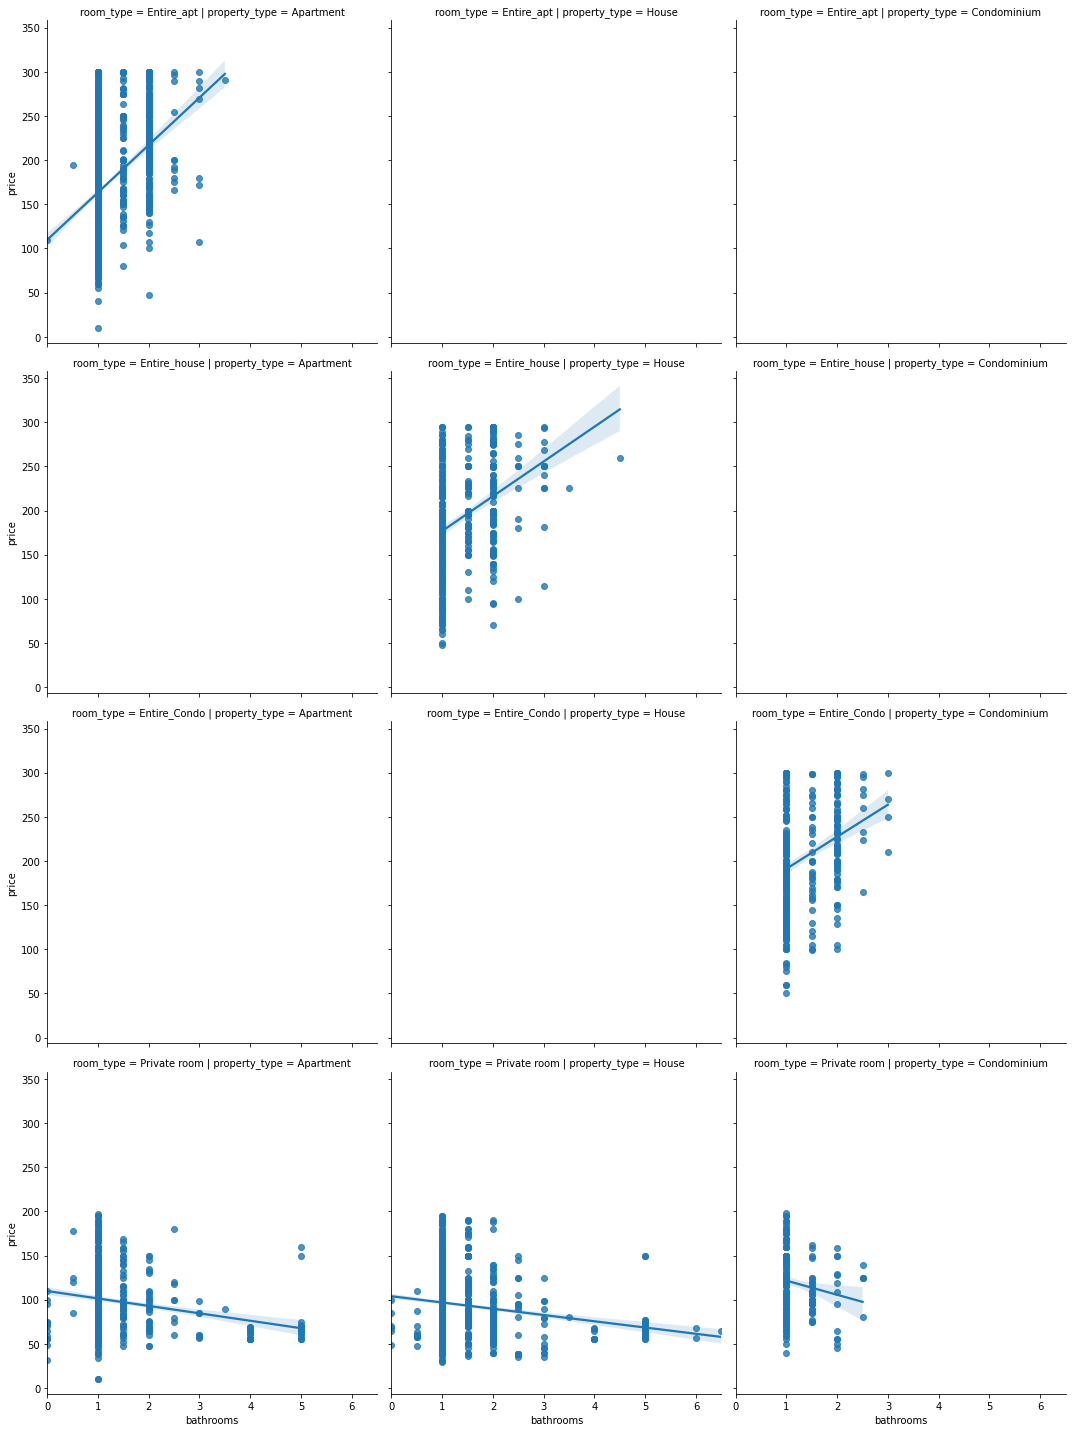

In [23]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['bathrooms'])
ax.axvline(np.nanpercentile(df['bathrooms'],25),color='red',label='25th Percentile')
ax.axvline(np.nanpercentile(df['bathrooms'],75),color='orange',label='50th Percentile')
ax.axvline(df['bathrooms'].median(),color='blue',label='Median')
ax.axvline(np.mean(df['bathrooms']),color='green',label='Mean')
plt.title('Distribution of the number of bathrooms')
plt.legend()
plt.show()

g=sns.FacetGrid(df,col='property_type',row='room_type',size=5)
g.map(sns.regplot,'bathrooms','price')
plt.show()

In [24]:
#Drop data that aren't useful
df=df.drop(df[(df['room_type']=='Others')&(df['property_type']=='Condominium')].index,axis=0)
df=df.drop(df[df['bedrooms']==0].index,axis=0)

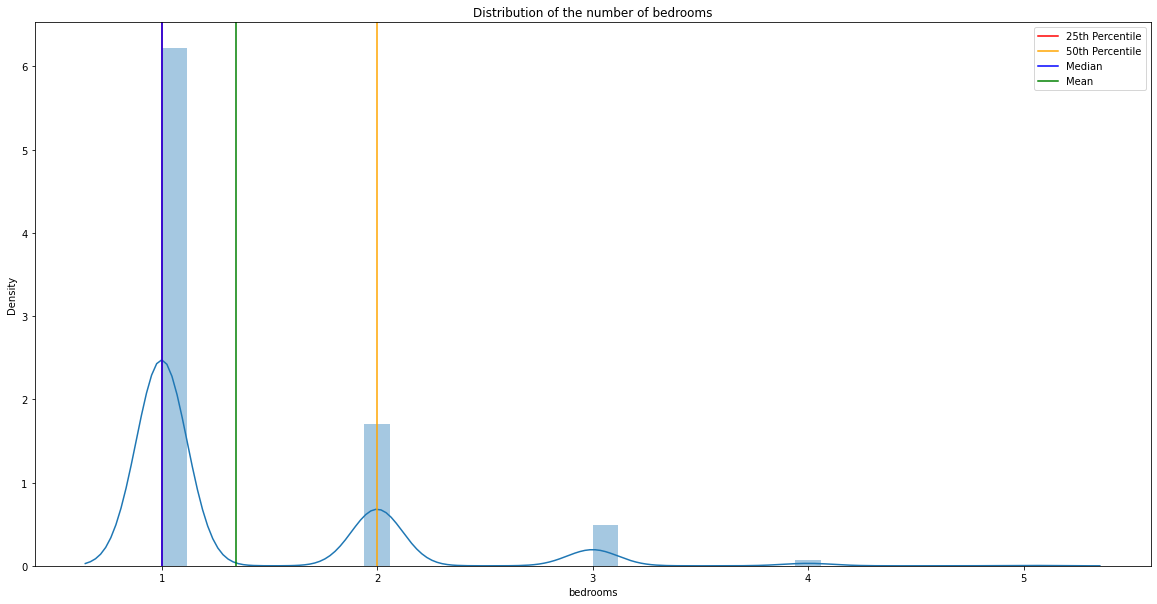

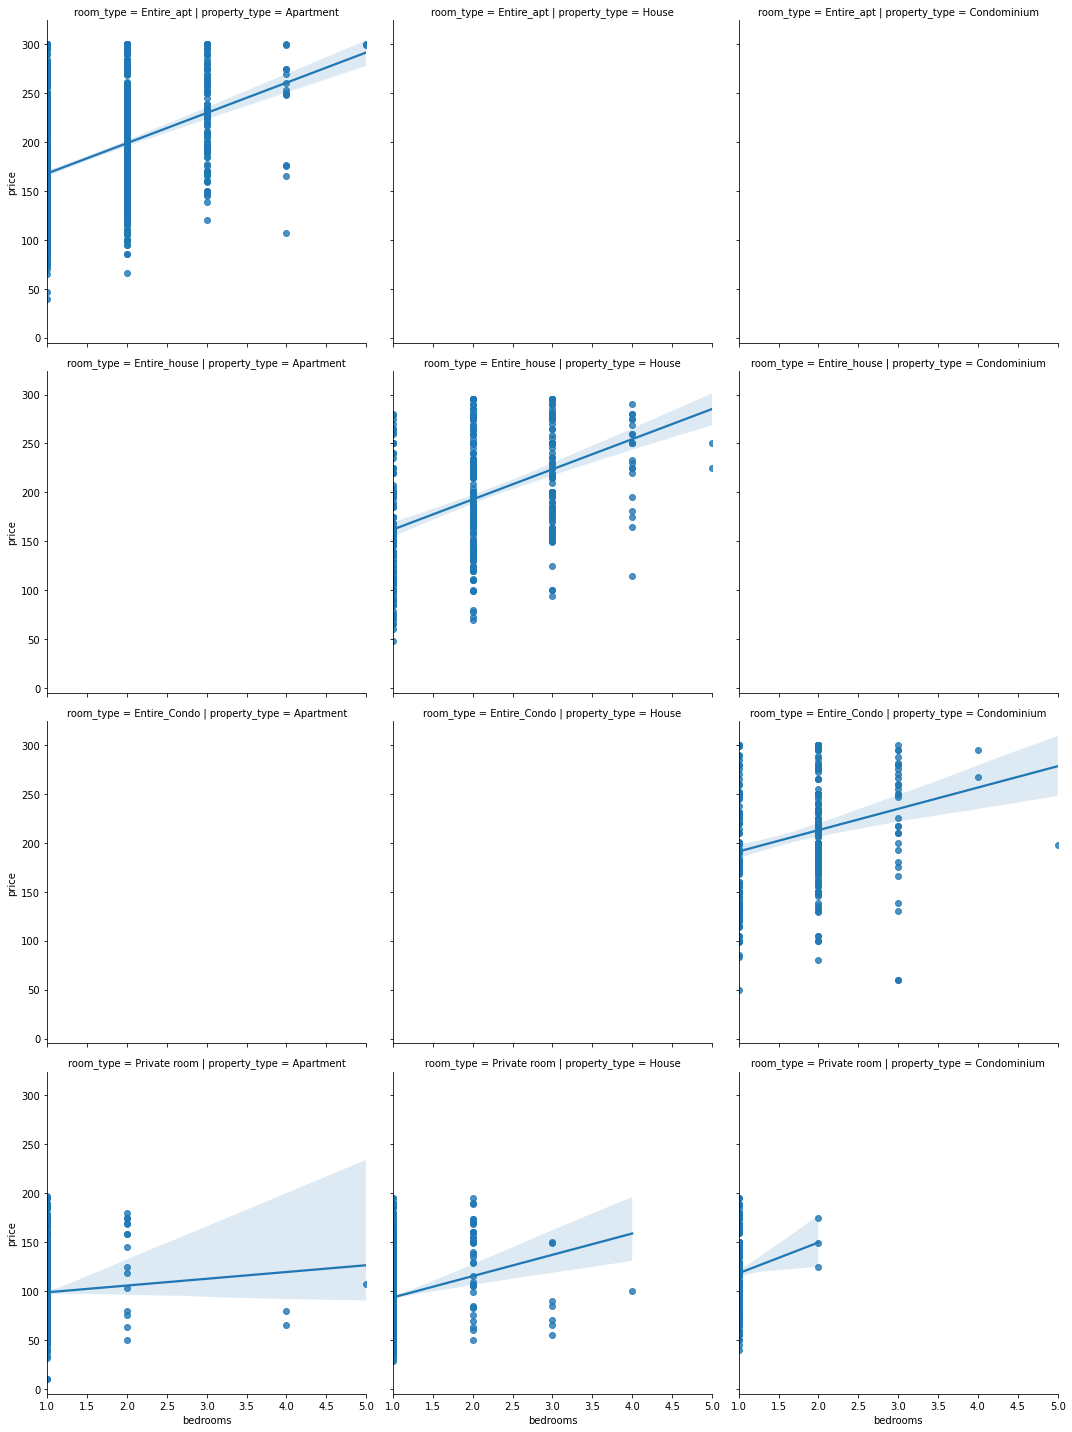

In [25]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['bedrooms'])
ax.axvline(np.nanpercentile(df['bedrooms'],25),color='red',label='25th Percentile')
ax.axvline(np.nanpercentile(df['bedrooms'],75),color='orange',label='50th Percentile')
ax.axvline(df['bedrooms'].median(),color='blue',label='Median')
ax.axvline(np.mean(df['bedrooms']),color='green',label='Mean')
plt.title('Distribution of the number of bedrooms')
plt.legend()
plt.show()


g=sns.FacetGrid(df,col='property_type',row='room_type',size=5)
g.map(sns.regplot,'bedrooms','price')
plt.show()

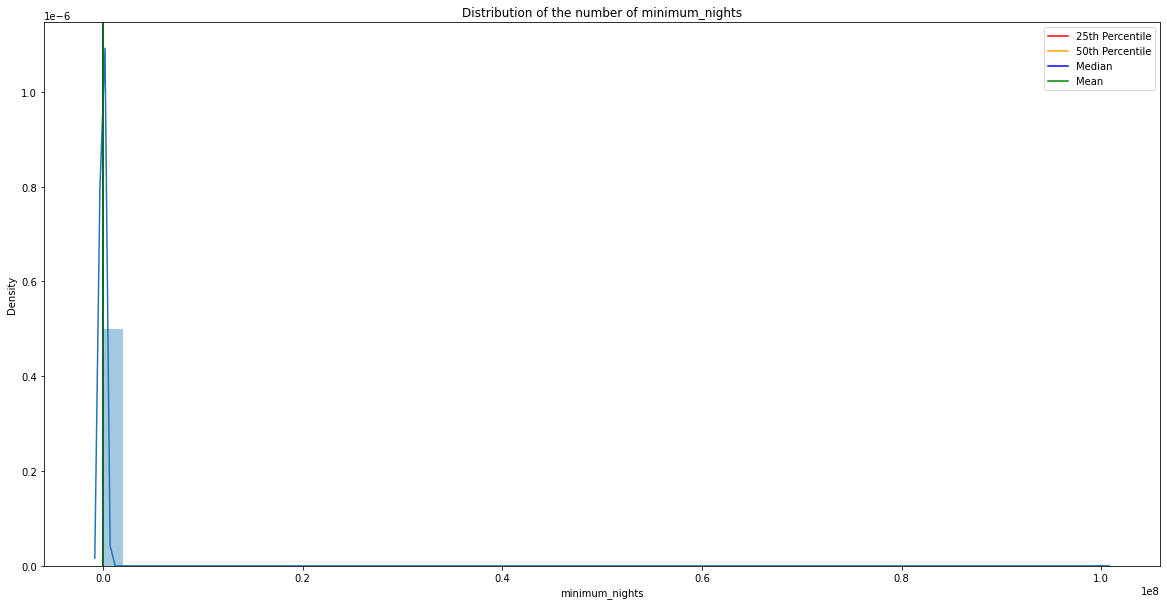

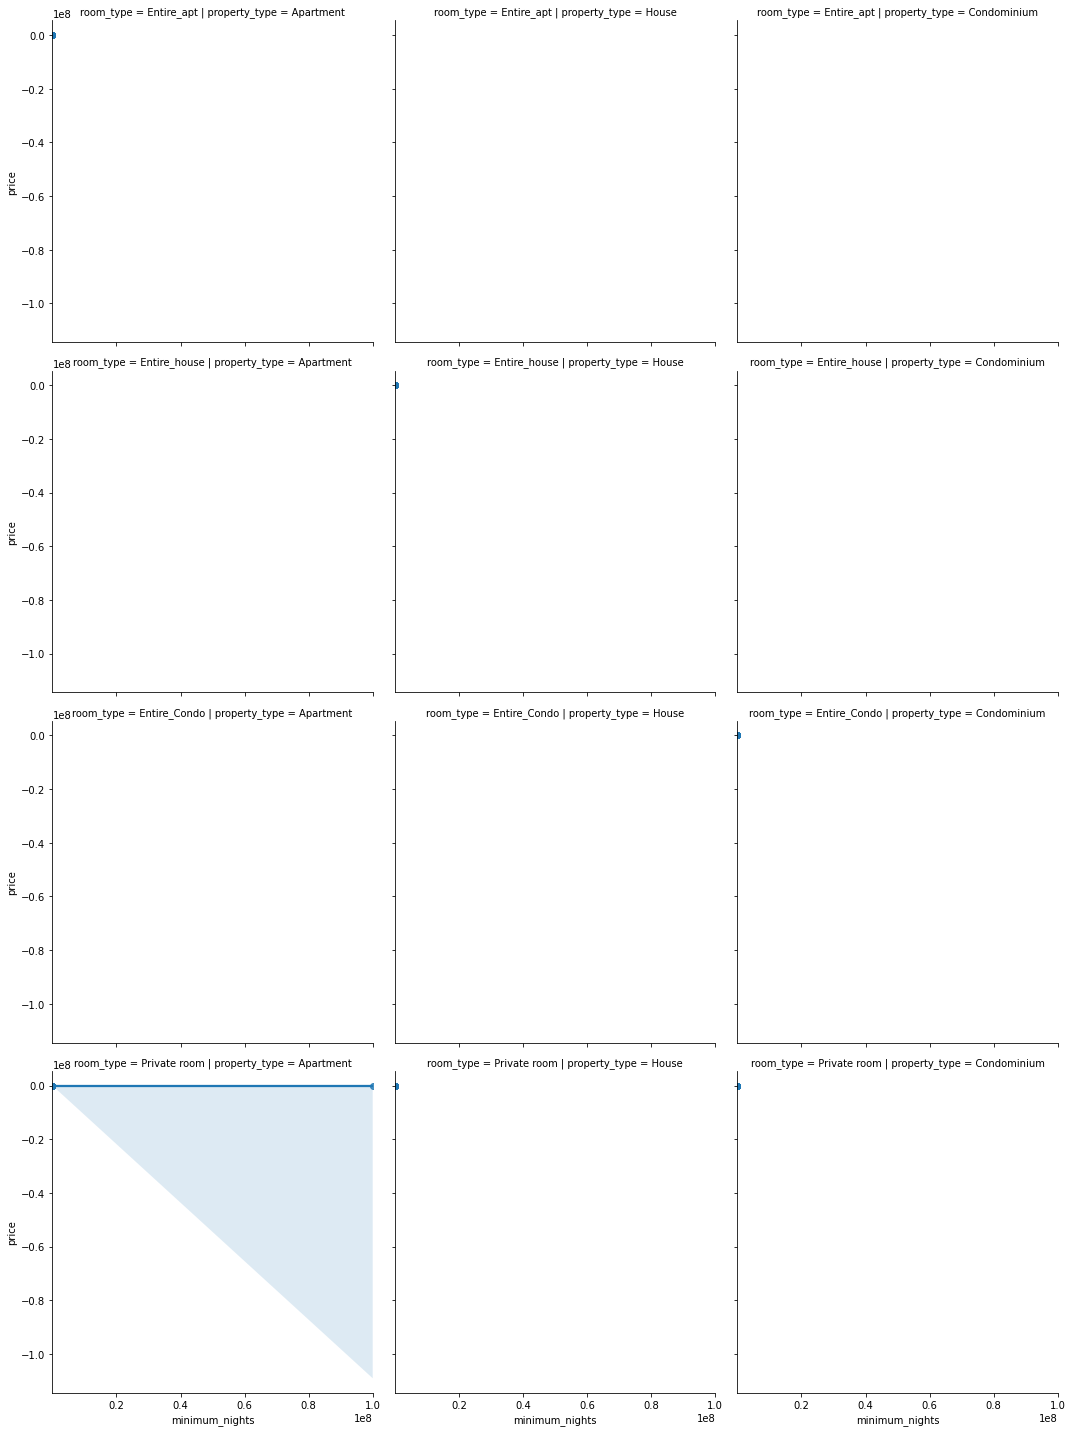

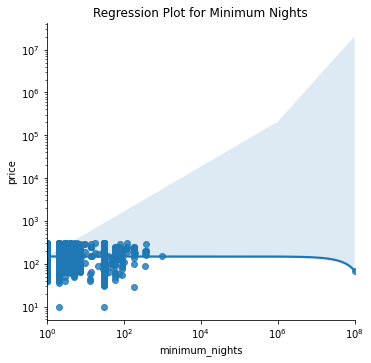

In [26]:
fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['minimum_nights'])
ax.axvline(np.nanpercentile(df['minimum_nights'],25),color='red',label='25th Percentile')
ax.axvline(np.nanpercentile(df['minimum_nights'],75),color='orange',label='50th Percentile')
ax.axvline(df['minimum_nights'].median(),color='blue',label='Median')
ax.axvline(np.mean(df['minimum_nights']),color='green',label='Mean')
plt.title('Distribution of the number of minimum_nights')
plt.legend()
plt.show()


g=sns.FacetGrid(df,col='property_type',row='room_type',size=5)
g.map(sns.regplot,'minimum_nights','price')
plt.show()

sns.lmplot(x='minimum_nights',y='price',data=df)
plt.title('Regression Plot for Minimum Nights')
plt.yscale('log')
plt.xscale('log')
plt.show()

The data is very distorted because of outliers

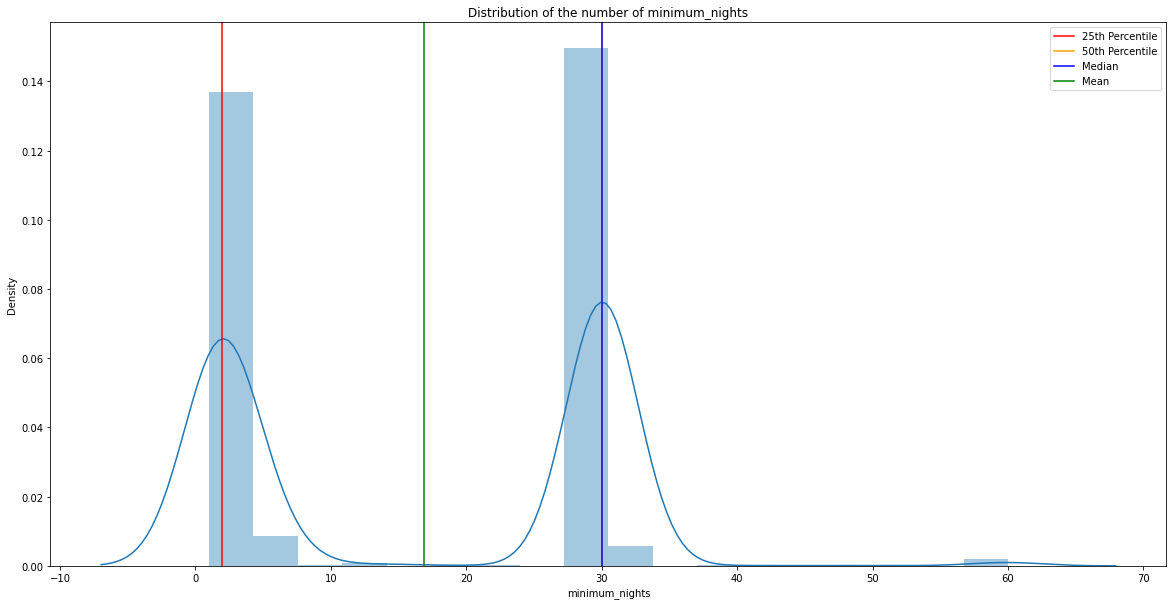

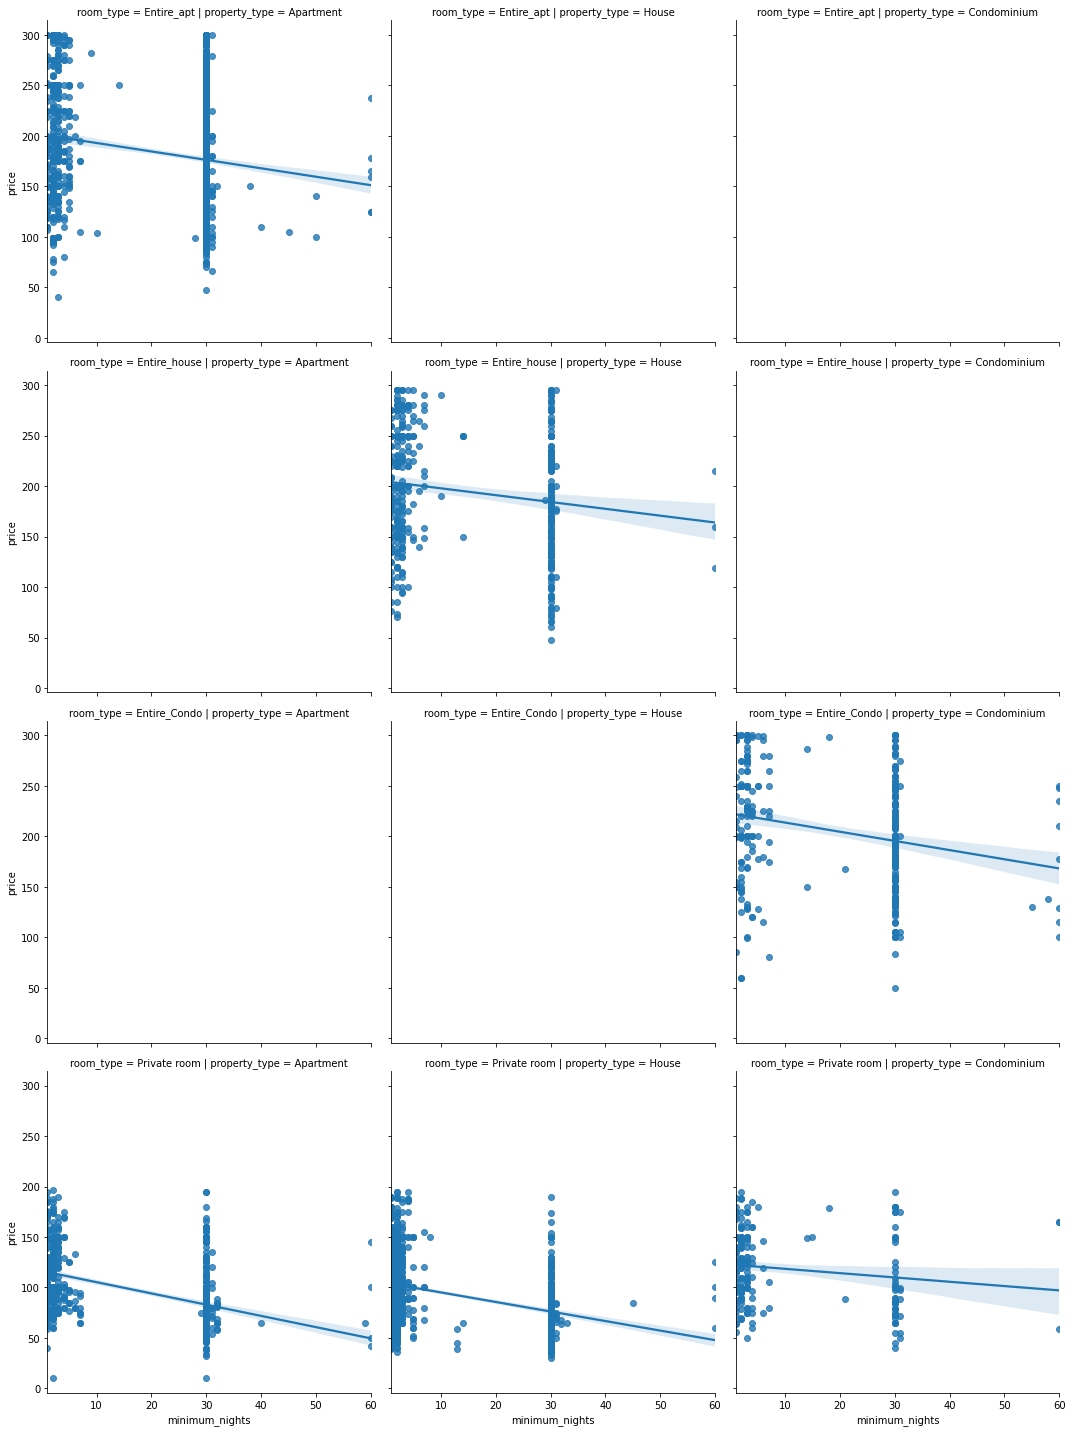

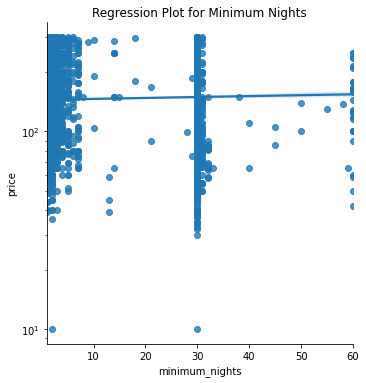

In [27]:
#Handling Outliers
upper_nights,lower_nights=outliers(df,'minimum_nights')
upper_nights,lower_nights
df=df.drop(df[df['minimum_nights']>upper_nights].index,axis=0)

fig,ax=plt.subplots(figsize=(20,10))
sns.distplot(df['minimum_nights'])
ax.axvline(np.nanpercentile(df['minimum_nights'],25),color='red',label='25th Percentile')
ax.axvline(np.nanpercentile(df['minimum_nights'],75),color='orange',label='50th Percentile')
ax.axvline(df['minimum_nights'].median(),color='blue',label='Median')
ax.axvline(np.mean(df['minimum_nights']),color='green',label='Mean')
plt.title('Distribution of the number of minimum_nights')
plt.legend()
plt.show()


g=sns.FacetGrid(df,col='property_type',row='room_type',size=5)
g.map(sns.regplot,'minimum_nights','price')
plt.show()

sns.lmplot(x='minimum_nights',y='price',data=df)
plt.title('Regression Plot for Minimum Nights')
plt.yscale('log')
plt.show()

In [28]:
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,4.603000e+03,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000
mean,1.980943e+07,37.763131,-122.431306,1.264501,1.342385,16.894199,147.228981
std,1.240545e+07,0.023157,0.027723,0.639956,0.635814,14.332698,65.763032
min,9.580000e+02,37.704630,-122.513060,0.000000,1.000000,1.000000,10.000000
25%,8.151806e+06,37.748065,-122.443870,1.000000,1.000000,2.000000,95.000000
50%,2.107026e+07,37.764430,-122.425850,1.000000,1.000000,30.000000,140.000000
75%,3.068140e+07,37.779590,-122.411975,1.000000,2.000000,30.000000,190.000000
max,3.935003e+07,37.810310,-122.368570,6.500000,5.000000,60.000000,300.000000


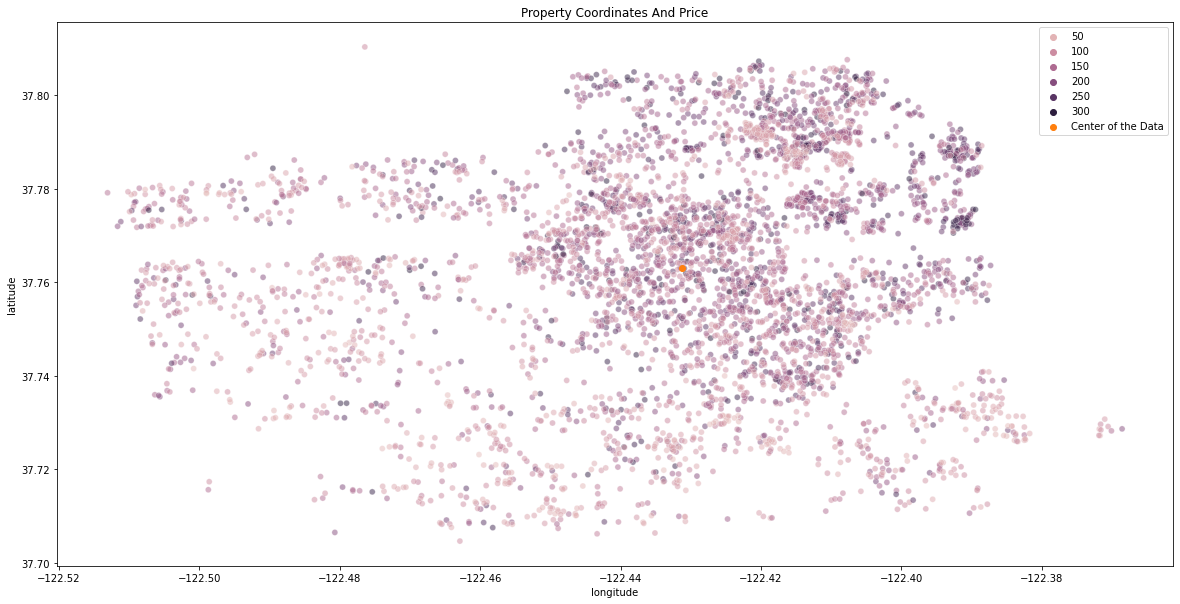

In [29]:
fig,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'],hue=df['price'],alpha=0.5)
plt.scatter(x=df['longitude'].mean(),y=df['latitude'].mean(),label='Center of the Data')
plt.title('Property Coordinates And Price')
plt.legend()
plt.show()

In [30]:
#Find distance to the center of the coordinates data
from math import sin, cos, sqrt, atan2, radians

def distance_to_city_center(lat2,lon2):
    lon1=df['longitude'].mean()
    lat1=df['latitude'].mean()
    
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c
    #return geopy.distance.geodesic(coords_1, coords_2).km

df['distance']=df.apply(lambda row: distance_to_city_center(row['latitude'],row['longitude']),axis=1)
    

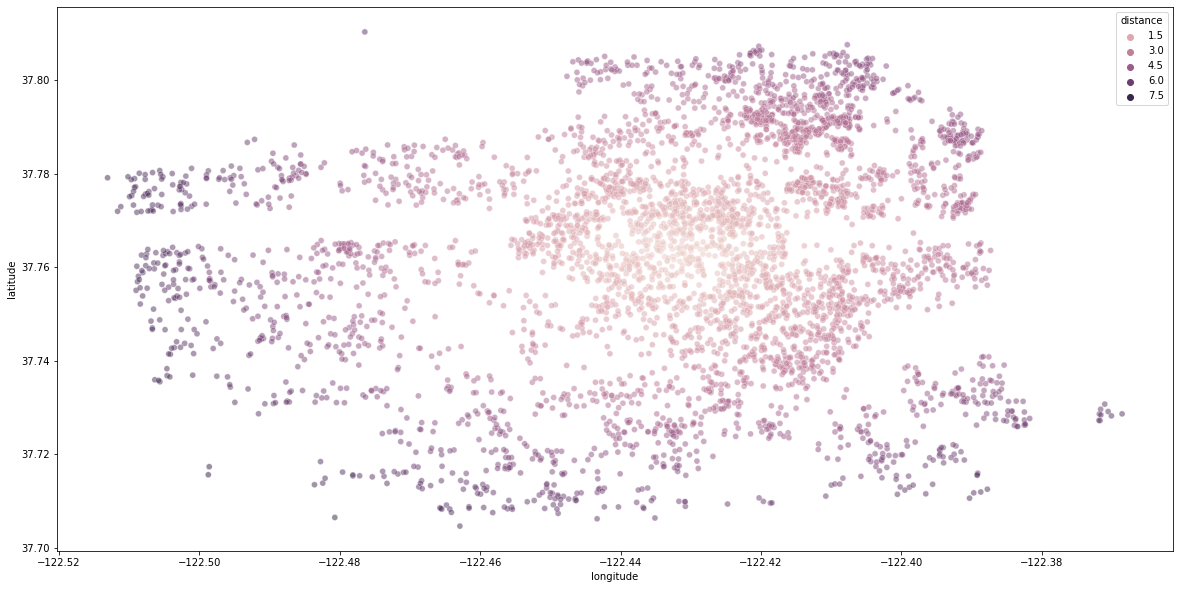

In [31]:
fig,ax=plt.subplots(figsize=(20,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'],hue=df['distance'],alpha=0.5)
plt.show()

In [32]:
df1=df.copy() 
df1=df1.drop(['longitude','latitude'],axis=1)
df1=df1.set_index('id')

#Filter to only include the Private room category
df1=df1[df1['room_type']=='Private room']
df1=pd.get_dummies(df1,drop_first=True)
df1

,bathrooms,bedrooms,minimum_nights,price,distance,property_type_Condominium,property_type_House
id,,,,,,,
7918,4.0,1.0,32,65.0,1.905216,0,0
8142,4.0,1.0,32,65.0,1.815081,0,0
12041,3.0,1.0,32,85.0,1.507414,0,0
12042,3.0,1.0,32,85.0,1.586151,0,0
12522,1.0,1.0,3,79.0,0.278661,0,0
...,...,...,...,...,...,...,...
38586329,1.0,1.0,1,80.0,1.353596,1,0
38620015,2.0,1.0,2,129.0,1.788699,1,0
38630128,2.0,1.0,2,149.0,1.698466,1,0


<AxesSubplot:>

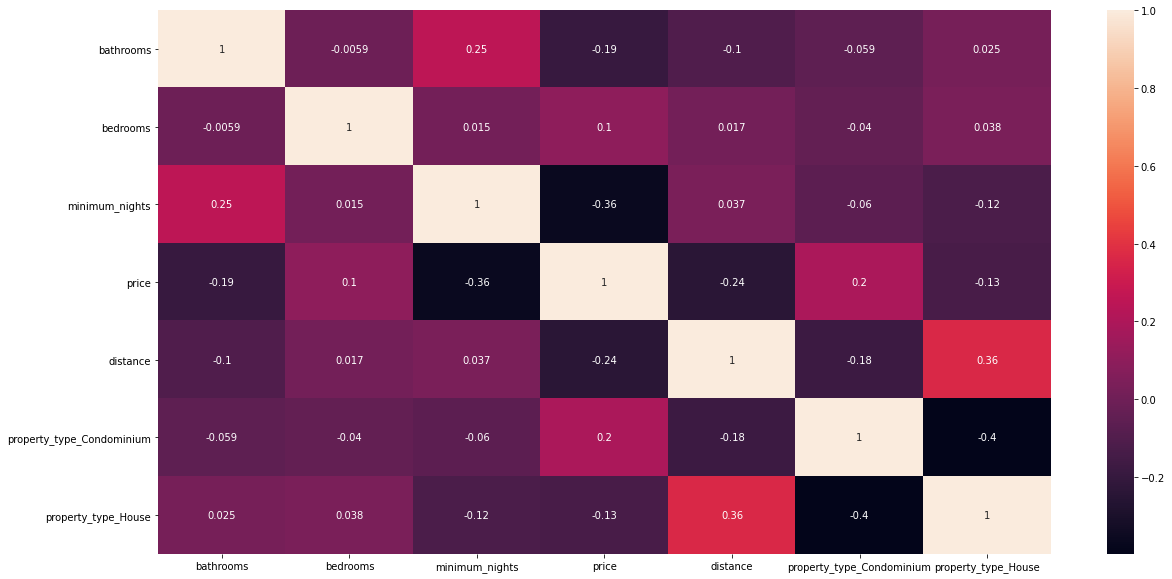

In [33]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [34]:
X=df1.drop('price',axis=1)
corr=abs(df1.corr().loc['price'])
#X=X.drop('minimum_nights',axis=1)
#X=X.drop(corr[corr<0.05].index,axis=1)
y=df1[['price']]
display(X.head())
y.head()

,bathrooms,bedrooms,minimum_nights,distance,property_type_Condominium,property_type_House
id,,,,,,
7918,4.0,1.0,32,1.905216,0,0
8142,4.0,1.0,32,1.815081,0,0
12041,3.0,1.0,32,1.507414,0,0
12042,3.0,1.0,32,1.586151,0,0
12522,1.0,1.0,3,0.278661,0,0


,price
id,
7918,65.0
8142,65.0
12041,85.0
12042,85.0
12522,79.0


In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
normalize=MinMaxScaler()
X1=normalize.fit_transform(X)

In [36]:
pd.DataFrame(X1,columns=X.columns).describe()

,bathrooms,bedrooms,minimum_nights,distance,property_type_Condominium,property_type_House
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,0.199809,0.010372,0.185463,0.423916,0.107773,0.567000
std,0.124905,0.061633,0.234836,0.220953,0.310167,0.495609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.000000,0.000000,0.240882,0.000000,0.000000
50%,0.153846,0.000000,0.016949,0.413049,0.000000,1.000000
75%,0.153846,0.000000,0.491525,0.588960,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3)

# Modeling

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

model=LinearRegression()
mse=mean_squared_error
mae=mean_absolute_error

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(mse(y_test,y_pred),mae(y_test,y_pred))

scores = cross_val_score(model, X_test, y_test, cv=5,scoring='neg_mean_absolute_error')
print(scores.mean())

940.0790005483232 24.284797631541593
-24.49351365334427


In [39]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.02, 
                     n_estimators=500,
                     nthread=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(mse(y_test,y_pred),mae(y_test,y_pred))
scores = cross_val_score(model, X_test, y_test, cv=5,scoring='neg_mean_absolute_error')
print(scores.mean())

945.7624304669703 23.70216874016656
-26.050617881048293


Using linear regression yields better result than using XGBoost Regressor. Because the result is already below 25 dollars, Hyperparameter Tuning is not needed since the result has already satisfied the requirements